In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from IPython import display
import time
from scipy.stats import norm

In [9]:
def get_nheads(nflips):
    nheads = 0
    for i in range(nflips):
        if np.random.random() > 0.5:
            nheads +=1
    return nheads
#print(nheads)

In [13]:
get_nheads(50)

29

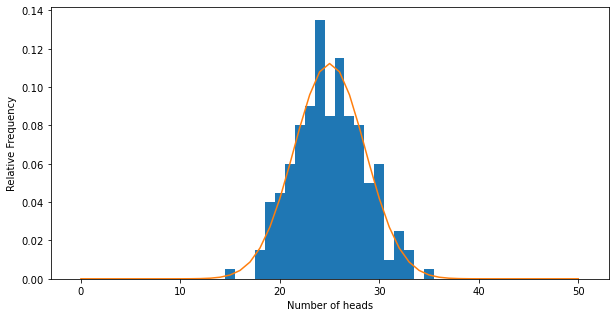

In [19]:
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))

ax1 = fig1.add_subplot()
#ax2 = fig1.add_subplot(122)
fig1.canvas.draw()

nheads_exp = []
ntests = 200
nflips = 50

p = .5
x = np.array(range(nflips+1))
align='mid'
if nflips%2==0:
    align='left'
for i in range(ntests):
    iheads = get_nheads(nflips)
    nheads_exp.append(iheads)

    ax1.clear()
    ax1.hist(nheads_exp, range=(0,nflips+1), bins = nflips+1, density=True, align=align)
    ax1.plot(x, binom.pmf(x, nflips, p))
    ax1.set_ylabel("Relative Frequency")
    ax1.set_xlabel("Number of heads")
    fig1.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.03)


In [20]:
nheads_exp

[21,
 27,
 26,
 33,
 31,
 22,
 20,
 28,
 26,
 24,
 24,
 19,
 21,
 22,
 30,
 20,
 26,
 22,
 27,
 27,
 19,
 29,
 23,
 20,
 27,
 27,
 19,
 32,
 28,
 23,
 24,
 25,
 24,
 21,
 26,
 26,
 27,
 25,
 26,
 26,
 27,
 29,
 20,
 28,
 23,
 24,
 23,
 24,
 27,
 25,
 24,
 28,
 15,
 27,
 24,
 27,
 25,
 23,
 30,
 19,
 27,
 23,
 28,
 22,
 29,
 28,
 26,
 25,
 28,
 32,
 24,
 27,
 23,
 21,
 25,
 24,
 22,
 25,
 24,
 20,
 19,
 24,
 30,
 25,
 21,
 26,
 28,
 18,
 24,
 26,
 29,
 26,
 26,
 22,
 28,
 25,
 23,
 24,
 28,
 18,
 32,
 29,
 22,
 30,
 30,
 23,
 28,
 22,
 23,
 26,
 27,
 23,
 28,
 23,
 24,
 26,
 24,
 24,
 24,
 22,
 28,
 25,
 33,
 30,
 28,
 23,
 24,
 33,
 26,
 23,
 30,
 21,
 26,
 22,
 24,
 29,
 24,
 24,
 25,
 23,
 26,
 25,
 18,
 25,
 29,
 32,
 29,
 26,
 24,
 23,
 29,
 30,
 19,
 21,
 22,
 26,
 27,
 29,
 23,
 27,
 25,
 30,
 25,
 26,
 20,
 25,
 20,
 26,
 31,
 22,
 26,
 21,
 28,
 27,
 32,
 21,
 21,
 20,
 27,
 23,
 22,
 24,
 28,
 30,
 19,
 25,
 24,
 30,
 26,
 22,
 24,
 30,
 22,
 35,
 21,
 22,
 21,
 19,
 24,
 20]

In [21]:
np.sum(nheads_exp)/len(nheads_exp)

25.015

In [22]:
np.mean(nheads_exp)

25.015

In [23]:
np.std(nheads_exp)

3.5347949021124263

In [24]:
nheads_exp = []
ntests = 200
for i in range(ntests):
    iheads = get_nheads(nflips)
    nheads_exp.append(iheads)

In [25]:
np.mean(nheads_exp)

25.155

In [26]:
def get_tests(ntests, nflips):
    nheads_exp = []
    for i in range(ntests):
        iheads = get_nheads(nflips)
        nheads_exp.append(iheads)

    return nheads_exp

In [33]:
nmeans_exp = []
for i in range(500):
    nheads_exp = get_tests(500, 50)
    imean = np.mean(nheads_exp)
    nmeans_exp.append(imean)

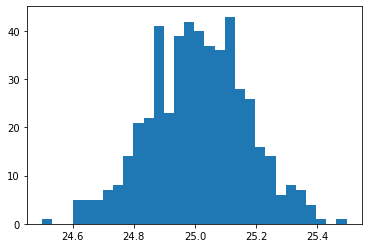

In [34]:
plt.hist(nmeans_exp,bins=30)
plt.show()

 Mean of the mean number of heads = 25.05 +/- 0.37 


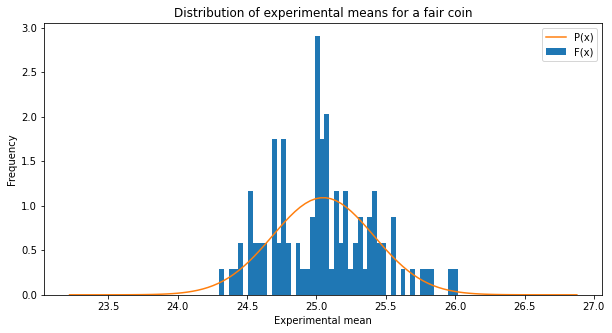

In [37]:
ntests = 100
nflips = 50
test_means = []
nexperiments = 100

for i in range(nexperiments):
    nheads_exp = get_tests(ntests, nflips)
    test_means.append(np.mean(nheads_exp))

mu = np.mean(test_means)
sigma = np.std(test_means)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)

print("\033[1m Mean of the mean number of heads = {:.2f} +/- {:.2f} \033[0m".format(mu,sigma))

fig1 = plt.figure(1, figsize=(10,5))
plt.hist(test_means, bins = nflips, density=True, label="F(x)")
plt.plot(x,y, label="P(x)")
plt.title("Distribution of experimental means for a fair coin")
plt.ylabel("Frequency")
plt.xlabel("Experimental mean")
plt.legend()
plt.show()

In [38]:
def get_nheads_weighted(nflips, weight):
    nheads = 0
    for i in range(nflips):
        if np.random.random() > weight:
            nheads += 1
    return nheads

def get_weighted_tests(ntests, nflips, weight):
    nheads_exp = []
    for i in range(ntests):
        iheads = get_nheads_weighted(nflips, weight)
        nheads_exp.append(iheads)

    return nheads_exp

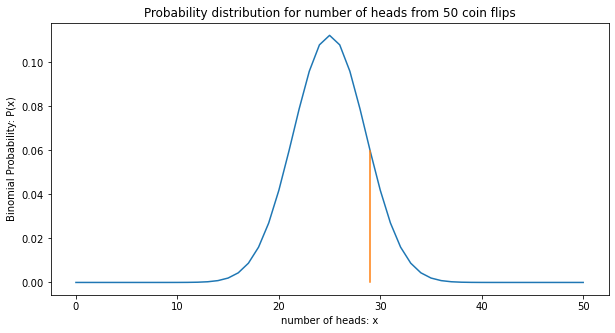

Fair coin: ave. nheads = 25.0, sigma = 3.536
Nheads between 17 and 32 have a Prob. to be fair of 0.960

 Number of heads = 29 

 Our flip is 1.13 sigma from the fair mean. 



In [39]:
fairness_weight = 0.40

nflips = 50

nheads = get_nheads_weighted(nflips, fairness_weight)

p = .5
x = np.array(range(nflips+1))

fig1 = plt.figure(1, figsize=(10,5))
plt.plot(x, binom.pmf(x, nflips, p))
plt.plot([nheads,nheads], [0,  binom.pmf(nheads, nflips, p)])
plt.title("Probability distribution for number of heads from 50 coin flips")
plt.ylabel("Binomial Probability: P(x)")
plt.xlabel("number of heads: x")
plt.show()

fair_mean = nflips*p
fair_sigma = np.sqrt(fair_mean*(1-p))

lowx = int(fair_mean-2*fair_sigma)
highx = int(fair_mean+2*fair_sigma)

bsum = 0
for x in range(lowx, highx):
    bsum += binom.pmf(x, nflips, p)

print("Fair coin: ave. nheads = {}, sigma = {:.3f}".format(fair_mean,fair_sigma))
print("Nheads between {} and {} have a Prob. to be fair of {:.3f}".format(lowx,highx,bsum))
print("")
print('\033[1m Number of heads = {} \033[0m'.format(nheads))
print("")
print("\033[1m\033[95m Our flip is {:.2f} sigma from the fair mean. \033[0m".format(np.abs(fair_mean-nheads)/fair_sigma))
print("")


 Fair coin: mean number of heads = 25.0, sigma = 3.54 
 Weighted coin: mean number of heads = 29.59, sigma_e = 3.26 


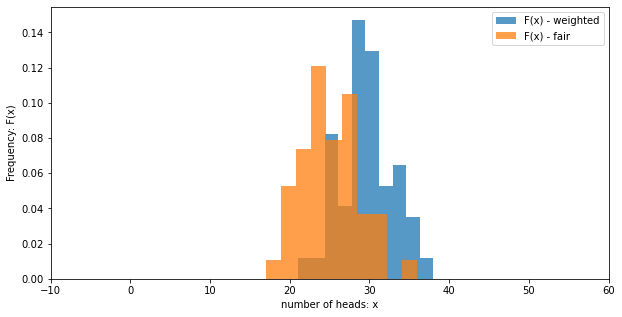

In [40]:
fairness_weight = 0.4

nflips = 50
ntests = 100

nheads = get_weighted_tests(ntests, nflips, fairness_weight)
nheads_f = get_tests(ntests, nflips)

p = .5
x = np.array(range(nflips+1))
fig1 = plt.figure(1, figsize=(10,5))
plt.hist(nheads,density=True, label="F(x) - weighted", alpha = 0.75)
plt.hist(nheads_f,density=True, label="F(x) - fair", alpha = 0.75)
#plt.plot(x, binom.pmf(x, nflips, p), label="P(x)")
plt.ylabel("Frequency: F(x)")
plt.xlabel("number of heads: x")
plt.xlim(int(fair_mean-10*fair_sigma),int(fair_mean+10*fair_sigma))
plt.legend()

fair_mean = nflips*p
fair_sigma = np.sqrt(fair_mean*(1-p))

print("\033[1m Fair coin: mean number of heads = {:.1f}, sigma = {:.2f} \033[0m".format(fair_mean,fair_sigma))
print("\033[1m Weighted coin: mean number of heads = {:.2f}, sigma_e = {:.2f} \033[0m".format(np.mean(nheads),np.std(nheads)))
plt.show()

In [47]:
fmean = np.mean(nheads_f)

In [48]:
wmean = np.mean(nheads)

In [49]:
func = np.std(nheads_f)/np.sqrt(100)

In [46]:
np.std(nheads)/np.sqrt(100)

0.32560558963261055

In [51]:
(fmean-wmean)/func

-11.957795205348594

In [52]:
np.sqrt(1250)

35.35533905932738

In [53]:
np.sqrt(1200)

34.64101615137755

In [64]:
N = 50

In [65]:

p = .5
x = N*p
sig = np.sqrt(N*p*(1-p))
print(x,sig)

25.0 3.5355339059327378


In [66]:
wp = .4
wx = N*wp
wsig = np.sqrt(N*p*(1-p))
print(wx,wsig)

20.0 3.5355339059327378


In [67]:
sep_50 = np.abs(x-wx)/sig

1.414213562373095

In [63]:
np.abs(x-wx)/sig

14.14213562373095